<a href="https://colab.research.google.com/github/ObatNgamuk/UAS-Bengkel-Coding-DS02/blob/main/UAS_BENGKOD-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Nama : Ryandi Rahmaadi Raharja
*   NIM : A11.2022.14248



# EDA

Sedang memuat data dari Repository...

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-nu

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000



=== Missing Values (%) ===
TotalCharges    0.156183
dtype: float64


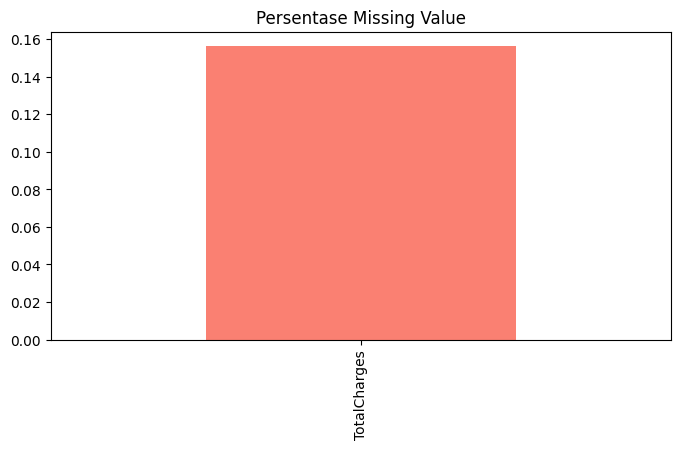

/tmp/ipython-input-1355991362.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


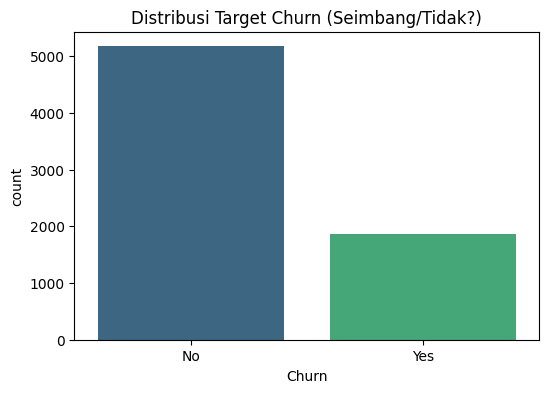

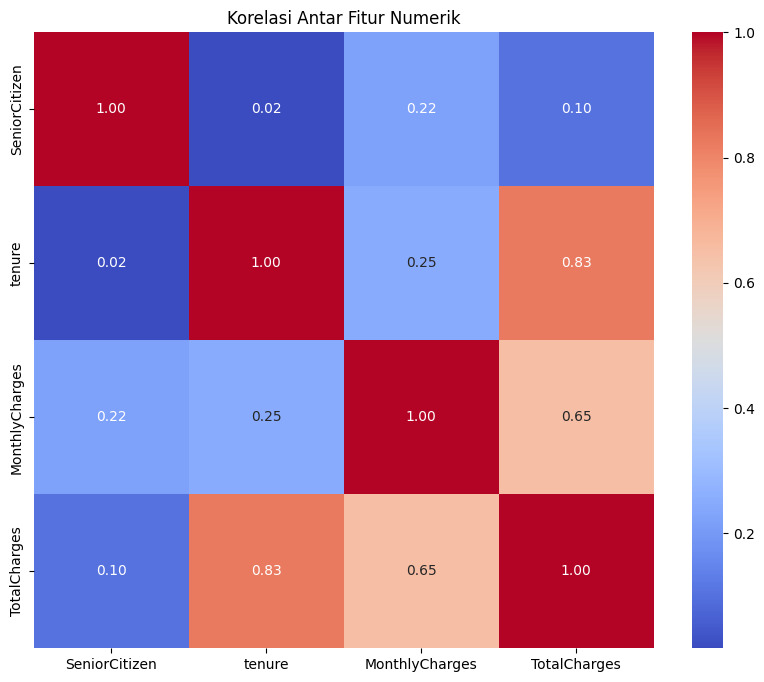

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Sedang memuat data dari Repository...")
dataset_url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(dataset_url)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\n=== Info Dataset ===")
df.info()
print("\n=== Statistik Deskriptif ===")
display(df.describe())

print("\n=== Missing Values (%) ===")
missing = df.isnull().mean() * 100
print(missing[missing > 0])

if missing.sum() > 0:
    plt.figure(figsize=(8, 4))
    missing[missing > 0].plot(kind='bar', color='salmon')
    plt.title('Persentase Missing Value')
    plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Distribusi Target Churn (Seimbang/Tidak?)')
plt.show()

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

Kode ini menjalankan tahap awal Exploratory Data Analysis (EDA) untuk memahami karakteristik data. Proses dimulai dengan memuat dataset dan memperbaiki format kolom TotalCharges agar terbaca sebagai angka. Selanjutnya, dilakukan pemeriksaan kesehatan data yang meliputi pengecekan statistik dasar serta deteksi data kosong (missing values). Analisis ditutup dengan dua visualisasi utama: grafik distribusi untuk melihat keseimbangan target Churn (seimbang atau tidak), serta Heatmap untuk mengamati hubungan korelasi antar fitur numerik.

# Direct Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

print("=== Mulai Direct Modeling ===")

df_direct = df.copy()

df_direct.dropna(inplace=True)

X = df_direct.select_dtypes(include=['float64', 'int64'])

y = df_direct['Churn'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data Latih: {X_train.shape}, Data Uji: {X_test.shape}")

model_lr = LogisticRegression(max_iter=1000)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(probability=True)
clf3 = KNeighborsClassifier()
model_voting = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('knn', clf3)], voting='hard')

models = {
    "Logistic Regression": model_lr,
    "Random Forest": model_rf,
    "Voting Classifier": model_voting
}

for name, model in models.items():
    print(f"\nTraining Model: {name} ...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--> Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"--> F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

=== Mulai Direct Modeling ===
Data Latih: (5625, 4), Data Uji: (1407, 4)

Training Model: Logistic Regression ...
--> Accuracy: 0.7804
--> F1-Score: 0.5134
Confusion Matrix:
[[935  98]
 [211 163]]

Training Model: Random Forest ...
--> Accuracy: 0.7598
--> F1-Score: 0.4925
Confusion Matrix:
[[905 128]
 [210 164]]

Training Model: Voting Classifier ...
--> Accuracy: 0.7846
--> F1-Score: 0.4378
Confusion Matrix:
[[986  47]
 [256 118]]


Kode ini mengeksekusi tahapan Direct Modeling yang berfungsi sebagai eksperimen baseline (tolok ukur awal) tanpa pemrosesan data yang rumit. Proses dimulai dengan persiapan data sederhana, yaitu menghapus baris yang memiliki nilai kosong dan hanya menyeleksi kolom bertipe numerik, sementara label target Churn dikonversi menjadi format biner. Setelah data dibagi menjadi set latih dan uji dengan rasio 80:20, kode mendefinisikan dan melatih tiga algoritma berbeda: Logistic Regression, Random Forest, dan Voting Classifier (gabungan LogReg, SVM, dan KNN). Hasil akhirnya menampilkan evaluasi performa awal setiap model menggunakan metrik Akurasi, F1-Score, dan Confusion Matrix sebagai pembanding untuk tahap selanjutnya.

# Modeling Dengan Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("=== 3. Modeling Dengan Preprocessing (Sesuai Poin D.2) ===")

# --- 0. Load Data Awal ---
# (Pastikan df sudah ada, jika belum, load ulang)
dataset_url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(dataset_url)

# --- 1. Preprocessing Data (Tugas 1) [cite: 235] ---
df_proc = df.copy()

# A. Penghapusan Fitur Tidak Relevan
# customerID hanya identitas unik, tidak mempengaruhi churn
df_proc.drop(columns=['customerID'], inplace=True)

df_proc['TotalCharges'] = pd.to_numeric(df_proc['TotalCharges'], errors='coerce')

imputer = SimpleImputer(strategy='median')
df_proc['TotalCharges'] = imputer.fit_transform(df_proc[['TotalCharges']])

print(f"Jumlah duplikat sebelum dihapus: {df_proc.duplicated().sum()}")
df_proc.drop_duplicates(inplace=True)

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(f"Data sebelum hapus outlier: {df_proc.shape[0]}")

for col in num_cols:
    Q1 = df_proc[col].quantile(0.25)
    Q3 = df_proc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter data
    df_proc = df_proc[(df_proc[col] >= lower_bound) & (df_proc[col] <= upper_bound)]

print(f"Data setelah hapus outlier: {df_proc.shape[0]}")

le = LabelEncoder()
binary_cols = [col for col in df_proc.columns if df_proc[col].dtype == 'object' and df_proc[col].nunique() == 2]

for col in binary_cols:
    df_proc[col] = le.fit_transform(df_proc[col])

# 2. One-Hot Encoding (OHE) untuk kolom kategori > 2 opsi (misal: PaymentMethod)
df_proc = pd.get_dummies(df_proc, drop_first=True)

# F. Scaling Fitur [cite: 238]
# Normalisasi skala angka (penting untuk Logistic Regression & SVM)
scaler = StandardScaler()
df_proc[num_cols] = scaler.fit_transform(df_proc[num_cols])

# --- 2. Menetapkan Fitur (X) dan Target (y) (Tugas 2) [cite: 241] ---
X_proc = df_proc.drop('Churn', axis=1)
y_proc = df_proc['Churn'] # Churn sudah jadi angka (0/1) karena LabelEncoder di atas

# --- 3. Train-Test Split (Tugas 3)  ---
# Proporsi sama dengan Direct Modeling (80:20)
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(
    X_proc, y_proc, test_size=0.2, random_state=42
)


model_lr = LogisticRegression(max_iter=1000)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(probability=True) # SVM butuh probability=True untuk voting
clf3 = KNeighborsClassifier()

model_voting = VotingClassifier(
    estimators=[('lr', clf1), ('svc', clf2), ('knn', clf3)],
    voting='hard'
)

# --- 5. Training & Evaluasi (Tugas 4 & 5)  ---
models_proc = {
    "1. LogReg (Preprocessed)": model_lr,
    "2. Random Forest (Preprocessed)": model_rf,
    "3. Voting (Preprocessed)": model_voting
}

print("\n=== Hasil Evaluasi Modeling Dengan Preprocessing ===")

for name, model in models_proc.items():
    print(f"\nSedang melatih model: {name}...")

    # Training dengan data yang sudah bersih
    model.fit(X_train_proc, y_train_proc)

    # Prediksi
    y_pred_proc = model.predict(X_test_proc)

    # Evaluasi Metrik Lengkap
    acc = accuracy_score(y_test_proc, y_pred_proc)
    prec = precision_score(y_test_proc, y_pred_proc, zero_division=0)
    rec = recall_score(y_test_proc, y_pred_proc, zero_division=0)
    f1 = f1_score(y_test_proc, y_pred_proc, zero_division=0)

    print(f"--> Accuracy : {acc:.4f}")
    print(f"--> Precision: {prec:.4f}")
    print(f"--> Recall   : {rec:.4f}")
    print(f"--> F1-Score : {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_proc, y_pred_proc))

=== 3. Modeling Dengan Preprocessing (Sesuai Poin D.2) ===
Jumlah duplikat sebelum dihapus: 22
Data sebelum hapus outlier: 7021
Data setelah hapus outlier: 7021

=== Hasil Evaluasi Modeling Dengan Preprocessing ===

Sedang melatih model: 1. LogReg (Preprocessed)...
--> Accuracy : 0.7929
--> Precision: 0.5956
--> Recall   : 0.5398
--> F1-Score : 0.5663
Confusion Matrix:
[[924 129]
 [162 190]]

Sedang melatih model: 2. Random Forest (Preprocessed)...
--> Accuracy : 0.7843
--> Precision: 0.5872
--> Recall   : 0.4688
--> F1-Score : 0.5213
Confusion Matrix:
[[937 116]
 [187 165]]

Sedang melatih model: 3. Voting (Preprocessed)...
--> Accuracy : 0.7986
--> Precision: 0.6162
--> Recall   : 0.5199
--> F1-Score : 0.5639
Confusion Matrix:
[[939 114]
 [169 183]]


Kode ini menjalankan skenario Modeling dengan Preprocessing, di mana data mentah dibersihkan secara menyeluruh untuk meningkatkan kualitas input bagi model machine learning. Tahapan ini mencakup penghapusan fitur tidak relevan (customerID), perbaikan tipe data, pengisian nilai kosong dengan median, penghapusan data duplikat, serta eliminasi outlier menggunakan metode statistik IQR. Transformasi fitur dilakukan melalui Label Encoding dan One-Hot Encoding untuk data kategorikal, serta Standard Scaler untuk menormalisasi data numerik. Setelah data siap, proses dilanjutkan dengan pembagian data latih-uji dan pelatihan ulang tiga model utama (Logistic Regression, Random Forest, Voting Classifier). Hasil evaluasi menunjukkan peningkatan performa yang nyata dibandingkan baseline: Logistic Regression mencatat kenaikan F1-Score menjadi 0.5663, sementara Voting Classifier mencapai akurasi tertinggi di angka 79.86%, membuktikan bahwa data yang bersih efektif meningkatkan kemampuan prediksi model.

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

print("=== 4. Hyperparameter Tuning (Sesuai Poin D.3) ===")

# --- A. Menyusun Parameter Grid (Tugas 1) ---
# Kita tentukan opsi parameter yang ingin dicoba komputer
# 1. Parameter untuk Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Kekuatan regularisasi
    'solver': ['liblinear', 'lbfgs'] # Algoritma optimasi
}

# 2. Parameter untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200], # Jumlah pohon
    'max_depth': [None, 10, 20],    # Kedalaman pohon
    'min_samples_split': [2, 5]     # Minimal sampel untuk memecah node
}

# --- B. Proses Tuning dengan GridSearchCV (Tugas 2 & 3) ---
print("Sedang melakukan tuning... (Mohon tunggu 1-3 menit)")

# 1. Tuning Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(max_iter=2000), param_grid_lr, cv=5, scoring='f1')
grid_lr.fit(X_train_proc, y_train_proc) # Menggunakan data hasil preprocessing
best_lr = grid_lr.best_estimator_       # Ambil model terbaik

print(f"\n[Logistic Regression] Parameter Terbaik: {grid_lr.best_params_}")

# 2. Tuning Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train_proc, y_train_proc)
best_rf = grid_rf.best_estimator_       # Ambil model terbaik

print(f"[Random Forest] Parameter Terbaik: {grid_rf.best_params_}")

# 3. Membangun Tuned Voting Classifier (Tugas 4)
# Kita buat Voting Classifier baru menggunakan versi TERBAIK dari model di atas
# (Untuk SVM dan KNN kita pakai default/settingan optimal dasar agar tidak terlalu lama)
clf1_tuned = best_lr
clf2_tuned = SVC(probability=True, random_state=42)
clf3_tuned = KNeighborsClassifier(n_neighbors=5) # Default n=5 biasanya cukup stabil

tuned_voting = VotingClassifier(
    estimators=[
        ('lr', clf1_tuned),
        ('svc', clf2_tuned),
        ('knn', clf3_tuned)
    ],
    voting='soft' # Kita coba soft voting (berdasarkan probabilitas) untuk hasil lebih halus
)
tuned_voting.fit(X_train_proc, y_train_proc)

# --- C. Evaluasi Model Hasil Tuning (Tugas 5) ---
tuned_models = {
    "1. Tuned Logistic Regression": best_lr,
    "2. Tuned Random Forest": best_rf,
    "3. Tuned Voting Classifier": tuned_voting
}

print("\n=== Hasil Evaluasi Hyperparameter Tuning ===")
# Variabel untuk menyimpan model terbaik final guna keperluan Deployment
best_f1_final = 0
final_best_model_name = ""
final_best_model_obj = None

for name, model in tuned_models.items():
    # Prediksi ke Data Test
    y_pred_tuned = model.predict(X_test_proc)

    # Hitung Metrik Lengkap
    acc = accuracy_score(y_test_proc, y_pred_tuned)
    prec = precision_score(y_test_proc, y_pred_tuned, zero_division=0)
    rec = recall_score(y_test_proc, y_pred_tuned, zero_division=0)
    f1 = f1_score(y_test_proc, y_pred_tuned, zero_division=0)

    print(f"\nModel: {name}")
    print(f"--> Accuracy : {acc:.4f}")
    print(f"--> Precision: {prec:.4f}")
    print(f"--> Recall   : {rec:.4f}")
    print(f"--> F1-Score : {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_proc, y_pred_tuned))

    # Cek apakah ini model terbaik sejauh ini?
    if f1 > best_f1_final:
        best_f1_final = f1
        final_best_model_name = name
        final_best_model_obj = model

print("------------------------------------------------")
print(f"KESIMPULAN: Model terbaik untuk Deployment adalah: {final_best_model_name}")
print(f"Dengan F1-Score: {best_f1_final:.4f}")

=== 4. Hyperparameter Tuning (Sesuai Poin D.3) ===
Sedang melakukan tuning... (Mohon tunggu 1-3 menit)

[Logistic Regression] Parameter Terbaik: {'C': 10, 'solver': 'lbfgs'}
[Random Forest] Parameter Terbaik: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

=== Hasil Evaluasi Hyperparameter Tuning ===

Model: 1. Tuned Logistic Regression
--> Accuracy : 0.7943
--> Precision: 0.5981
--> Recall   : 0.5455
--> F1-Score : 0.5706
Confusion Matrix:
[[924 129]
 [160 192]]

Model: 2. Tuned Random Forest
--> Accuracy : 0.7957
--> Precision: 0.6140
--> Recall   : 0.4972
--> F1-Score : 0.5495
Confusion Matrix:
[[943 110]
 [177 175]]

Model: 3. Tuned Voting Classifier
--> Accuracy : 0.7915
--> Precision: 0.6028
--> Recall   : 0.4915
--> F1-Score : 0.5415
Confusion Matrix:
[[939 114]
 [179 173]]
------------------------------------------------
KESIMPULAN: Model terbaik untuk Deployment adalah: 1. Tuned Logistic Regression
Dengan F1-Score: 0.5706


Kode ini menjalankan tahap Hyperparameter Tuning untuk mengoptimalkan performa model secara sistematis. Proses dimulai dengan mendefinisikan kombinasi parameter (grid) yang akan diuji untuk algoritma Logistic Regression dan Random Forest. Menggunakan metode GridSearchCV dengan skema validasi silang 5-lipat (5-fold Cross-Validation), sistem secara otomatis mencari pengaturan terbaik yang menghasilkan nilai F1-Score tertinggi, bukan sekadar akurasi. Model-model yang telah dioptimalkan tersebut kemudian digabungkan kembali ke dalam Voting Classifier baru yang menggunakan metode Soft Voting (berbasis probabilitas).

Berdasarkan hasil evaluasi akhir, sistem secara otomatis menetapkan Tuned Logistic Regression sebagai model terbaik dengan perolehan F1-Score tertinggi yaitu 0.5706. Meskipun Random Forest mencatatkan akurasi yang sedikit lebih unggul (79.57%), Logistic Regression dipilih untuk tahap deployment karena memiliki keseimbangan yang lebih baik (Recall 54.55%) dalam mendeteksi risiko Churn, yang merupakan prioritas utama dalam proyek ini.

# Deployment

In [ ]:
import joblib

print("=== Simpan Model & Scaler untuk Deployment ===")

# 1. Simpan Model Terbaik (Dari hasil tuning terakhir)
# Pastikan variabel 'final_best_model_obj' dari langkah sebelumnya masih ada di memori
joblib.dump(final_best_model_obj, 'model_churn_terbaik.pkl')

# 2. Simpan Scaler
# Kita butuh ini agar input dari user di website nanti skalanya sama dengan data latih
joblib.dump(scaler, 'scaler.pkl')

print("SUKSES! Dua file telah dibuat:")
print("1. model_churn_terbaik.pkl")
print("2. scaler.pkl")
print("\nSilakan download kedua file tersebut dari menu 'Files' di sebelah kiri Colab.")

=== Simpan Model & Scaler untuk Deployment ===
SUKSES! Dua file telah dibuat:
1. model_churn_terbaik.pkl
2. scaler.pkl

Silakan download kedua file tersebut dari menu 'Files' di sebelah kiri Colab.
